In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
pick_in = open('data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [3]:
random.shuffle(data)
features = []
labels = []

In [4]:
for feature,label in data:
    features.append(feature)
    labels.append(label)

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.25)

model = SVC(C=1,kernel = 'poly',gamma='auto')
model.fit(xtrain,ytrain)

pick = open('model.sav','rb')   # trained model using the same code with 80% training 
model = pickle.load(pick)
pick.close()

Accuracy:  0.9491404011461319
Prediction is:  RING-BILLED GULL


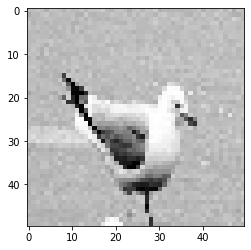

In [20]:
prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

categories = ['GILDED FLICKER', 'NORTHERN FLICKER','RUBY THROATED HUMMINGBIRD', 'ANNAS HUMMINGBIRD','SAND MARTIN', 'COMMON HOUSE MARTIN','TREE SWALLOW','EASTERN BLUEBIRD', 'INDIGO BUNTING','HOUSE FINCH', 'PURPLE FINCH','NORTHERN GANNET', 'WHITE TAILED TROPIC','OCELLATED TURKEY', 'WILD TURKEY','RING-BILLED GULL', 'CALIFORNIA GULL','BEARDED BARBET']

print('Accuracy: ', accuracy)
print('Prediction is: ',categories[prediction[0]])

mybird = xtest[0].reshape(50,50)
plt.imshow(mybird,cmap='gray')
plt.show()